In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

2021.07.21

水汽通量垂直积分的绘图部分，计算散度并绘制

从 shumflux_vi_count.ipynb 的预存数据中读取，进行绘图

In [2]:
dir_in = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA_large/dyn/shum_flux/"
mod_list    = ['obs', 'vr', 'rcm']
season_list = ['am', 'jja']
# 读取水汽通量的垂直积分
uflux_vi = {}
vflux_vi = {}

for imod in mod_list:
    uflux_vi[imod]  = {}
    vflux_vi[imod]  = {}
    
    for iseason in season_list:
        uflux_vi[imod][iseason]  = xr.open_dataset(dir_in + "shum_uflux_"+iseason+".nc")[imod]
        vflux_vi[imod][iseason]  = xr.open_dataset(dir_in + "shum_vflux_"+iseason+".nc")[imod]

In [3]:
uflux_vi['obs']

{'am': <xarray.DataArray 'obs' (Time: 1220, latitude: 220, longitude: 280)>
 [75152000 values with dtype=float64]
 Coordinates:
   * Time       (Time) datetime64[ns] 1998-04-01 1998-04-02 ... 2017-05-31
   * latitude   (latitude) float32 5.125 5.375 5.625 5.875 ... 59.37 59.62 59.87
   * longitude  (longitude) float32 70.12 70.37 70.62 70.87 ... 139.4 139.6 139.9,
 'jja': <xarray.DataArray 'obs' (Time: 1840, latitude: 220, longitude: 280)>
 [113344000 values with dtype=float64]
 Coordinates:
   * Time       (Time) datetime64[ns] 1998-06-01 1998-06-02 ... 2017-08-31
   * latitude   (latitude) float32 5.125 5.375 5.625 5.875 ... 59.37 59.62 59.87
   * longitude  (longitude) float32 70.12 70.37 70.62 70.87 ... 139.4 139.6 139.9}

## 计算散度

散度为垂直积分之后的水汽通量，计算3d变量的散度

In [4]:
from metpy.units import units
import metpy.calc
# 按照均匀网格计算divergence

# 设置为等间距网格
dx = units.Quantity(25*1e3, "m")
dy = units.Quantity(25*1e3, "m")
# 垂直积分之后计算散度
div_vi = {}
div_vi_mean = {}

for imod in mod_list:
    div_vi[imod]  = {}  
    div_vi_mean[imod]  = {}  
    for iseason in season_list:
        div_vi[imod][iseason] = metpy.calc.divergence(uflux_vi[imod][iseason], vflux_vi[imod][iseason], dx=dx, dy=dy, x_dim = 1, y_dim = 2)
        div_vi_mean[imod][iseason] = div_vi[imod][iseason].mean(dim = 'Time')

In [5]:
div_vi_mean['vr']['am']

Magnitude,[[-2.367053911753258e-07 -6.029214495631804e-07 -1.3913817510259864e-06 ... -3.238623142867184e-06 -3.416194092094101e-06 -3.83635016463574e-06] [1.952121460447972e-07 -1.3033907705764928e-06 -1.7347810373734446e-06 ... -3.4113506172604546e-06 -3.5173628836205835e-06 -3.9600175505406e-06] [-1.2659990947882388e-06 -1.6223826319583237e-06 -1.8408553856743988e-06 ... -4.023669016316146e-06 -3.859806156854599e-06 -3.918019978334951e-06] ... [-6.112977917174135e-07 -5.39542135219845e-07 -5.740977952347065e-07 ... -2.9195961388177543e-07 -1.91739280939561e-07 -5.225995527215109e-07] [-1.294560040336433e-07 -1.4194192158155556e-07 -3.08955712139665e-07 ... -1.9045746825529388e-07 -8.710777684525592e-07 -9.243532251527856e-07] [7.77562785689516e-08 -1.8624679718962131e-07 -3.65550957561724e-09 ... -2.2783066054380236e-06 -1.7261633474503429e-06 -2.5995150657861054e-07]]
Units,1/meter


In [16]:
# 国内政区图的绘制
# Load the border data, CN-border-La.dat is download from
# https://gmt-china.org/data/CN-border-La.dat
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

----- tick levels is : [-2.00000000e-05 -1.80000000e-05 -1.60000000e-05 -1.40000000e-05
 -1.20000000e-05 -1.00000000e-05 -8.00000000e-06 -6.00000000e-06
 -4.00000000e-06 -2.00000000e-06  1.01643954e-20  2.00000000e-06
  4.00000000e-06  6.00000000e-06  8.00000000e-06  1.00000000e-05
  1.20000000e-05  1.40000000e-05  1.60000000e-05  1.80000000e-05
  2.00000000e-05]


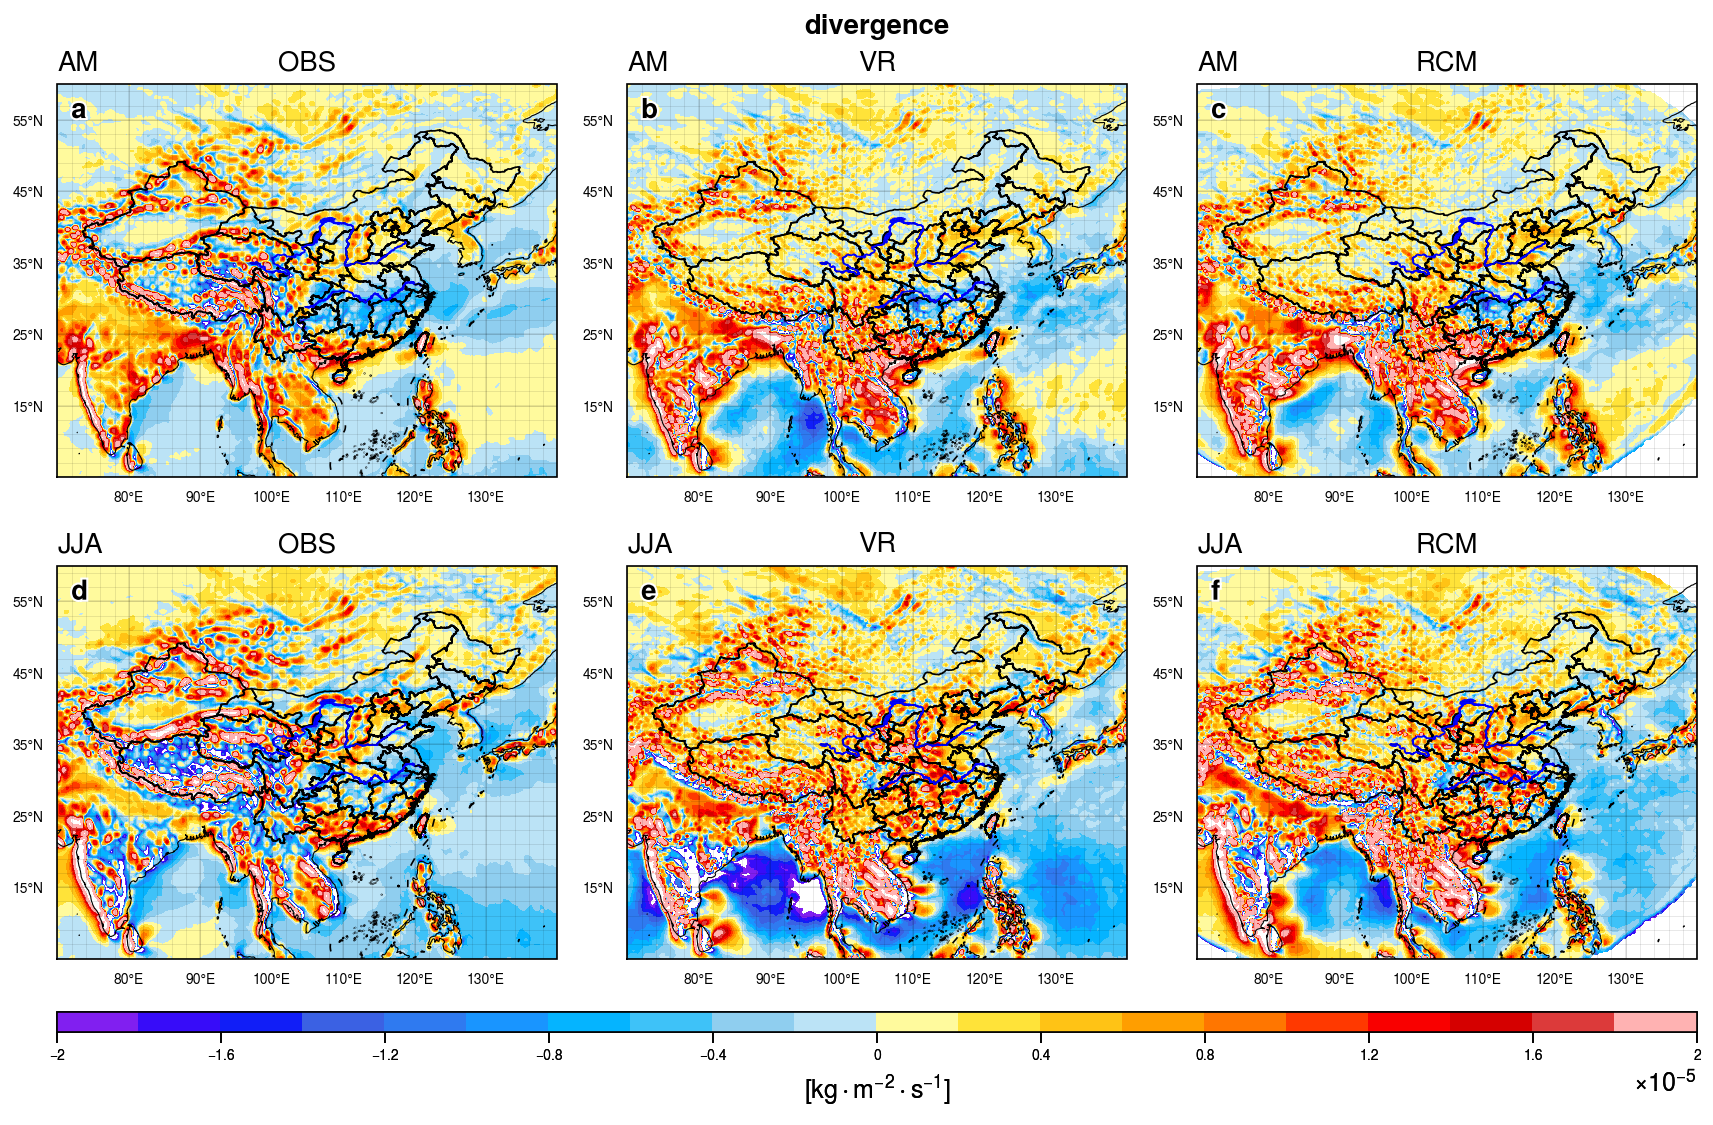

In [17]:
# import proplot as plot
from matplotlib import pyplot as plt
import proplot as plot
import cmaps
# ----- get filter vars coords-----

lon = div_vi_mean['obs']['am'].longitude.values
lat = div_vi_mean['obs']['am'].latitude.values

#----- create plot -----
fig, axs = plot.subplots(ncols=3 ,nrows=2, proj=('cyl'))

##---- 直接绘图，从边界文件添加
turn_on_border = True
if(turn_on_border):
    # for ax_ind in axs:
    # for line in borders:
        # axs.plot(line[0::100], line[1::100], lw = 0.5, color='gray',transform=ccrs.Geodetic())
        # axs.plot(line[0::10], line[1::10], lw = 0.4, color='black',transform=ccrs.Geodetic())
    ##---- 使用shp文件添加
        ## shapefile数据下载的位置：
    ## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
    # world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
    river_border_shapefile =  "/raid52/yycheng/MPAS/REFERENCE/MODEL_CONSTANT/R1/" + "hyd1_4l.shp"
    southsea_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "southsea_island.shp"
    ninelines_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "nine_lines.shp"
    ## 来源： 沛沛的诸省 + 诸岛
    bou24p_shapefile     = "/m2data2/yycheng/data_stage/CN-border/peipeihelp/" + "bou2_4p.shp"
    ## 来源： https://www.resdc.cn/data.aspx?DATAID=200
    province_shapefile     = "/m2data2/yycheng/data_stage/CN-border/CN-sheng/" + "change_proj_CN-sheng-A.shp"

    for ax in axs:
        # world     = shpreader.Reader(world_border_shapefile).geometries()
        # river     = shpreader.Reader(river_border_shapefile).geometries()
        river     = shpreader.Reader(river_border_shapefile, encoding = 'gbk')
        # bou24p    = shpreader.Reader(bou24p_shapefile).geometries()
        ninelines = shpreader.Reader(ninelines_shapefile).geometries()
        province  = shpreader.Reader(province_shapefile).geometries()
        # ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.4, zorder=1)
        # ax.add_geometries(bou24p, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1) # 沛沛map
        ax.add_geometries(province, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1) # 地资所
        ax.add_geometries(ninelines, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1)
        # ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.4, zorder=1)
        # 绘制部分的shapefile
        for region in river.records():
            if (region.attributes['NAME'] in ['黄河','长江']):
                # print("----- draw river! -----")
                # 此处需要使用 [] 让region.geometry可以迭代
                ax.add_geometries([region.geometry], ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.6, zorder=1)


#----- colorbar ticks 统一设置 -----
# cmap = 'gist_ncar'
# cmap = new_cmap
# cmap = 'BWR'
cmap = cmaps.ncl_default

mean_ticks = plot.arange(-2*1e-5,2*1e-5,2*1e-6)
print("----- tick levels is : " + str(mean_ticks))


plot_ind = 0
for iseason in season_list:
    for imod in mod_list:
        m_mean = axs[plot_ind].contourf(lon, lat, div_vi_mean[imod][iseason],\
        levels=mean_ticks,cmap=cmap)
        axs[plot_ind].format(title = imod.upper())
        axs[plot_ind].format(ltitle = iseason.upper())
        plot_ind = plot_ind + 1
#----- add color bar-----
# fig.colorbar(m_overlay, loc='b', cmap=cmap, width=0.1)

fig.colorbar(m_mean, loc='b', width=0.1,
ticklabelsize=5,ticks=mean_ticks[::2],label="[" + r"$kg \cdot m^{-2} \cdot s^{-1}$" + "]")

# axs[0].colorbar(m_mean, loc='b', width=0.1,
# ticklabelsize=5,ticks=mean_ticks)

# axs[1].colorbar(m_idctn, loc='b', width=0.1,
# ticklabelsize=5,ticks=idctn_ticks)

# axs[2].colorbar(m_idctn_diff, loc='b',width=0.1,
# ticklabelsize=5,ticks=diff_ticks)

# ----- setting title -----

# axs[0,:].format(ltitle = 'AM')
# axs[1,:].format(ltitle = 'JJA')

# ----- format setting -----
axs.format(
abc=True,
abcloc = 'ul',
#----- 地图底图设置 -----
# reso = 'x-hi',
reso = 'med',
# coast = False,
coast = True,
coastlinewidth = 0.4,
borders = False,
lakes = False,
land  = False,
ocean = False,
# cartopyautoextent = True, 
# borderslinewidth=.5,
labels = True,
longrid  = True,
latgrid  = True,
#-----GEO axis-----
lonlim=(70, 140), latlim=(5, 60),
gridlabelsize = 5,
gridminor = True,
lonlocator = np.arange(70,142,10),
latlocator = np.arange(5,65+2,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(5,65+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="divergence",
)

#----- save figure -----
fig.patch.set_facecolor('white')
plt.savefig('./output_pic/qflux_div_vi_large.png', dpi=500, facecolor= "white")